In [41]:
import numpy as np
import pandas as pd
import os
import gc
import configparser
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from skimage.measure import structural_similarity as ssim
from skimage import io

from utils.infrared import *
from utils.training import *
from utils.align import *
from utils.renderer import *

%matplotlib inline

In [42]:
# debug
#target_filename = 'train_2080' # failed
#target_filename = 'train_2078'
#target_filename = 'train_10483'

#target_filename = 'train_17173' #cloud
#target_filename = 'train_18173'
#jpg_filename = train_jpg(target_filename)
#tiff_filename = train_tif(target_filename)

target_filename = 'file_11854'
jpg_filename = test_jpg(target_filename)
tiff_filename = test_tif(target_filename)


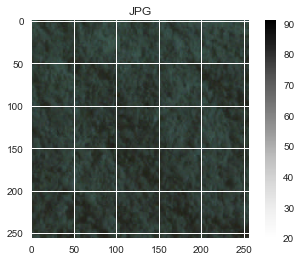

In [43]:
# train_17173 has JPG and TIF mis-aligned
show_jpg(jpg_filename)

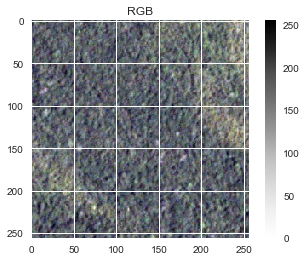

In [44]:
show_tiff_rgb(tiff_filename)

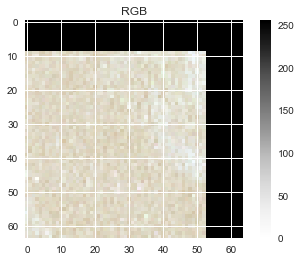

In [45]:
rescaled_dim = 64

jpg_img_raw = cv2.imread(jpg_filename)
tif_img_raw = cv2.imread(tiff_filename, cv2.IMREAD_UNCHANGED)

jpg_img_raw = cv2.resize(jpg_img_raw, (rescaled_dim, rescaled_dim))
tif_img_raw = cv2.resize(tif_img_raw, (rescaled_dim, rescaled_dim))

#print(jpg_img_raw.shape)
#print(jpg_img_raw.dtype)
#print(tif_img_raw.shape)
#print(tif_img_raw.dtype)

#show_tiff_image_data(tif_img_raw)

try:
    tiff_aligned = align_target_tif_to_jpg(tif_img_raw, jpg_img_raw, tif_img_raw, verbose=True)
    #print(tiff_aligned.shape)
    show_tiff_image_data(tiff_aligned)
except cv2.error:
    print('Error: TIF and JPG are NOT correlated {}'.format(target_filename))